In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [2]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    

In [3]:
image = cv2.imread('Lion.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

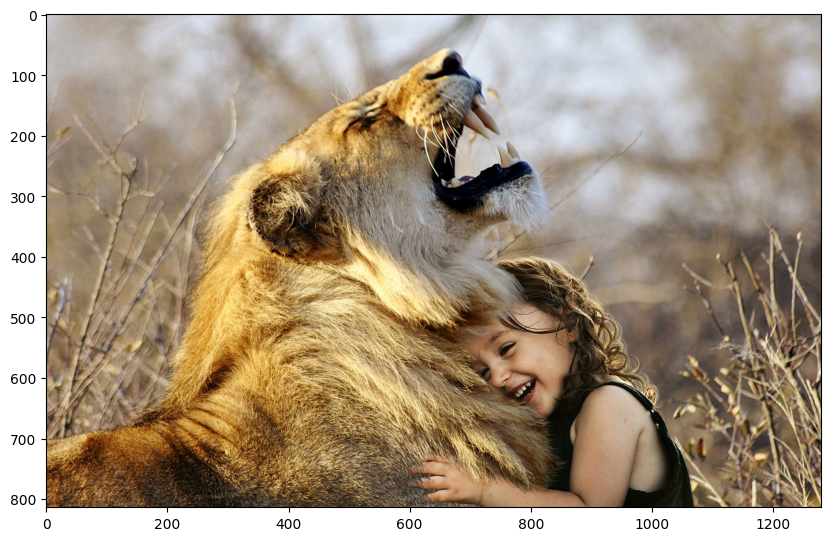

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()

In [5]:
## Create th SAM model object

In [6]:
sam_checkpoint = "sam_vit_h_4b8939.pth"
device = "cpu"
model_type = "default"

In [7]:
from segment_anything import sam_model_registry, SamPredictor

In [8]:
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

In [9]:
predictor.set_image(image)

In [10]:
## Selec Our point

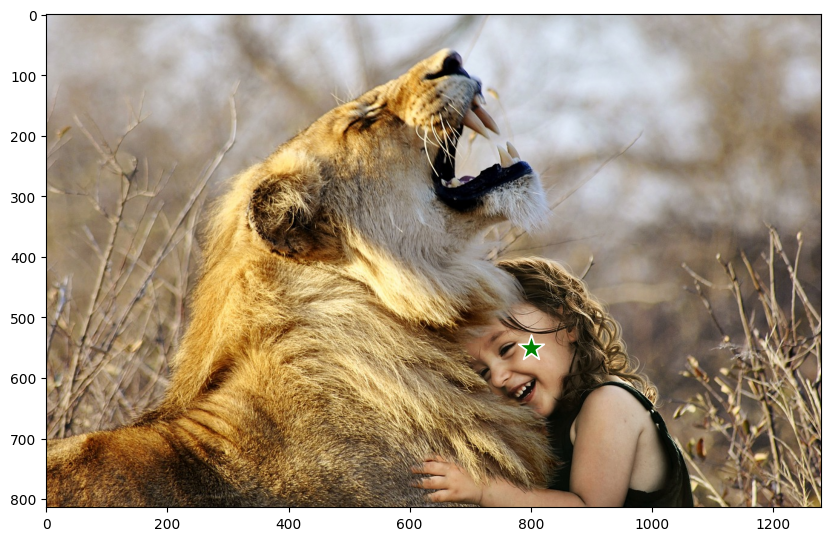

In [11]:
input_point = np.array([[800, 550]])
input_label = np.array([1])

plt.figure(figsize=(10,10))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()  

In [12]:
masks, scores, logits = predictor.predict(point_coords=input_point, 
                  point_labels=input_label, 
                  multimask_output=True)

In [13]:
masks.shape # (number of mask) x H x W

(3, 814, 1280)

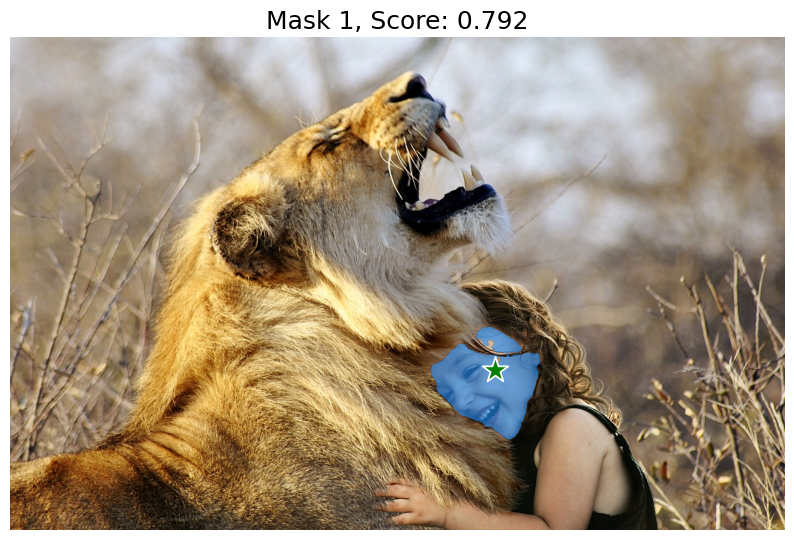

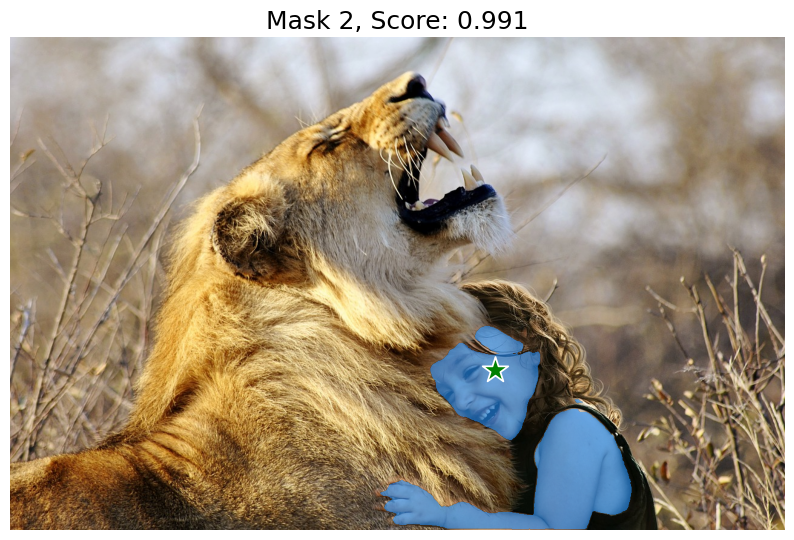

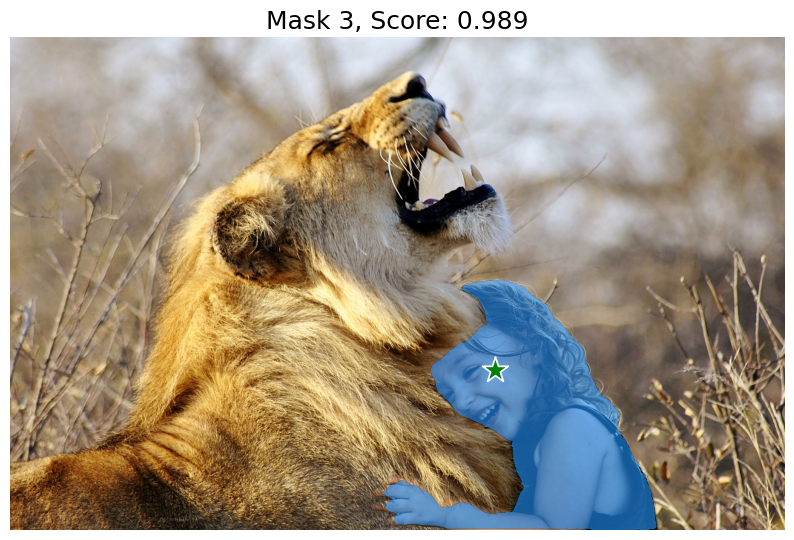

In [14]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()

In [15]:
## Try on diferent image 

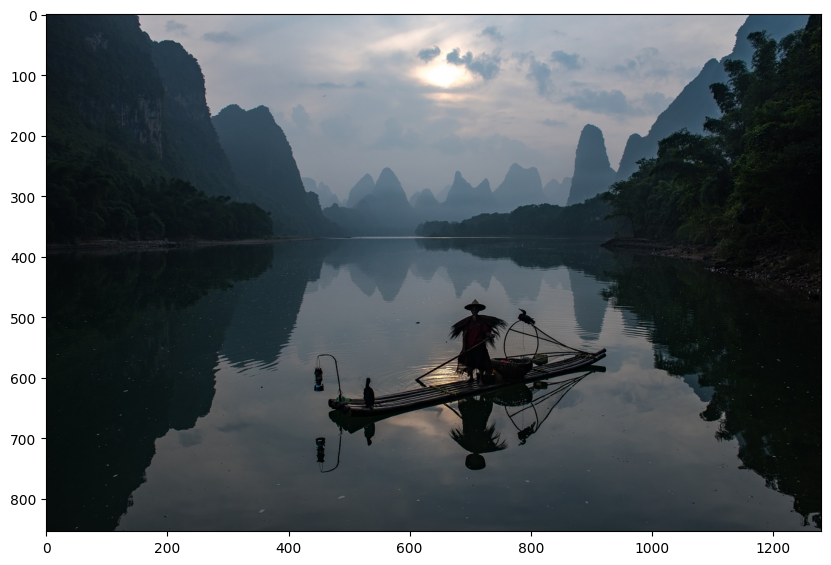

In [16]:
image = cv2.imread('china.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()

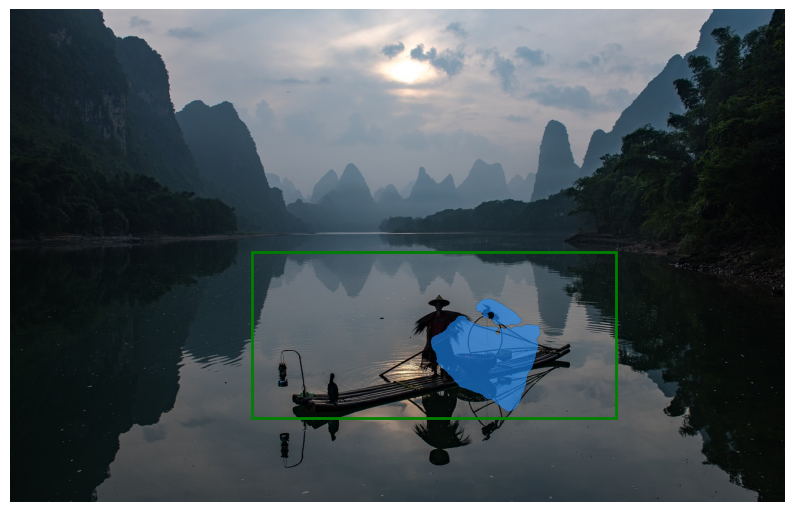

In [17]:
input_box = np.array([1000,400,400,675]) 
plt.figure(figsize=(10,10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
plt.axis('off')
plt.show()

In [18]:
predictor = SamPredictor(sam)
predictor.set_image(image)

In [19]:
input_box = np.array([1000,400,400,675])

masks, _, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    box=input_box,
    multimask_output=True,
)

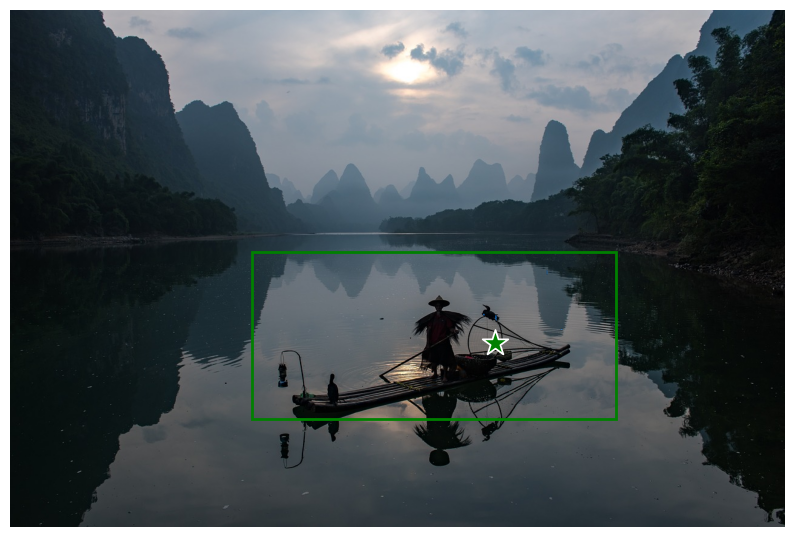

In [20]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
show_points(input_point, input_label, plt.gca())
plt.axis('off')
plt.show()

In [21]:
## Auto segmentation

In [25]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import cv2 
import matplotlib.pyplot as plt

sam_checkpoint = "sam_vit_h_4b8939.pth"
device = "cpu"
model_type = "default"

image = cv2.imread('china.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [57]:
mask = mask_generator.generate(image)

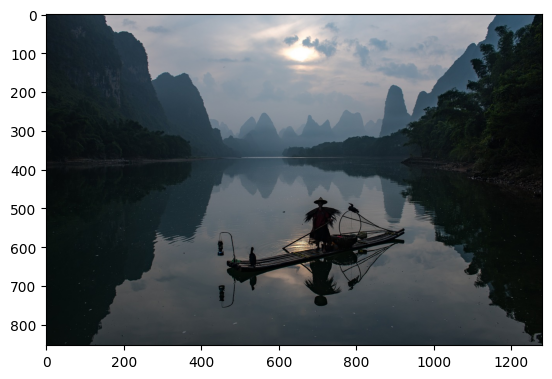

In [58]:
plt.imshow(image)

In [68]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)). tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))

In [69]:
import numpy as np

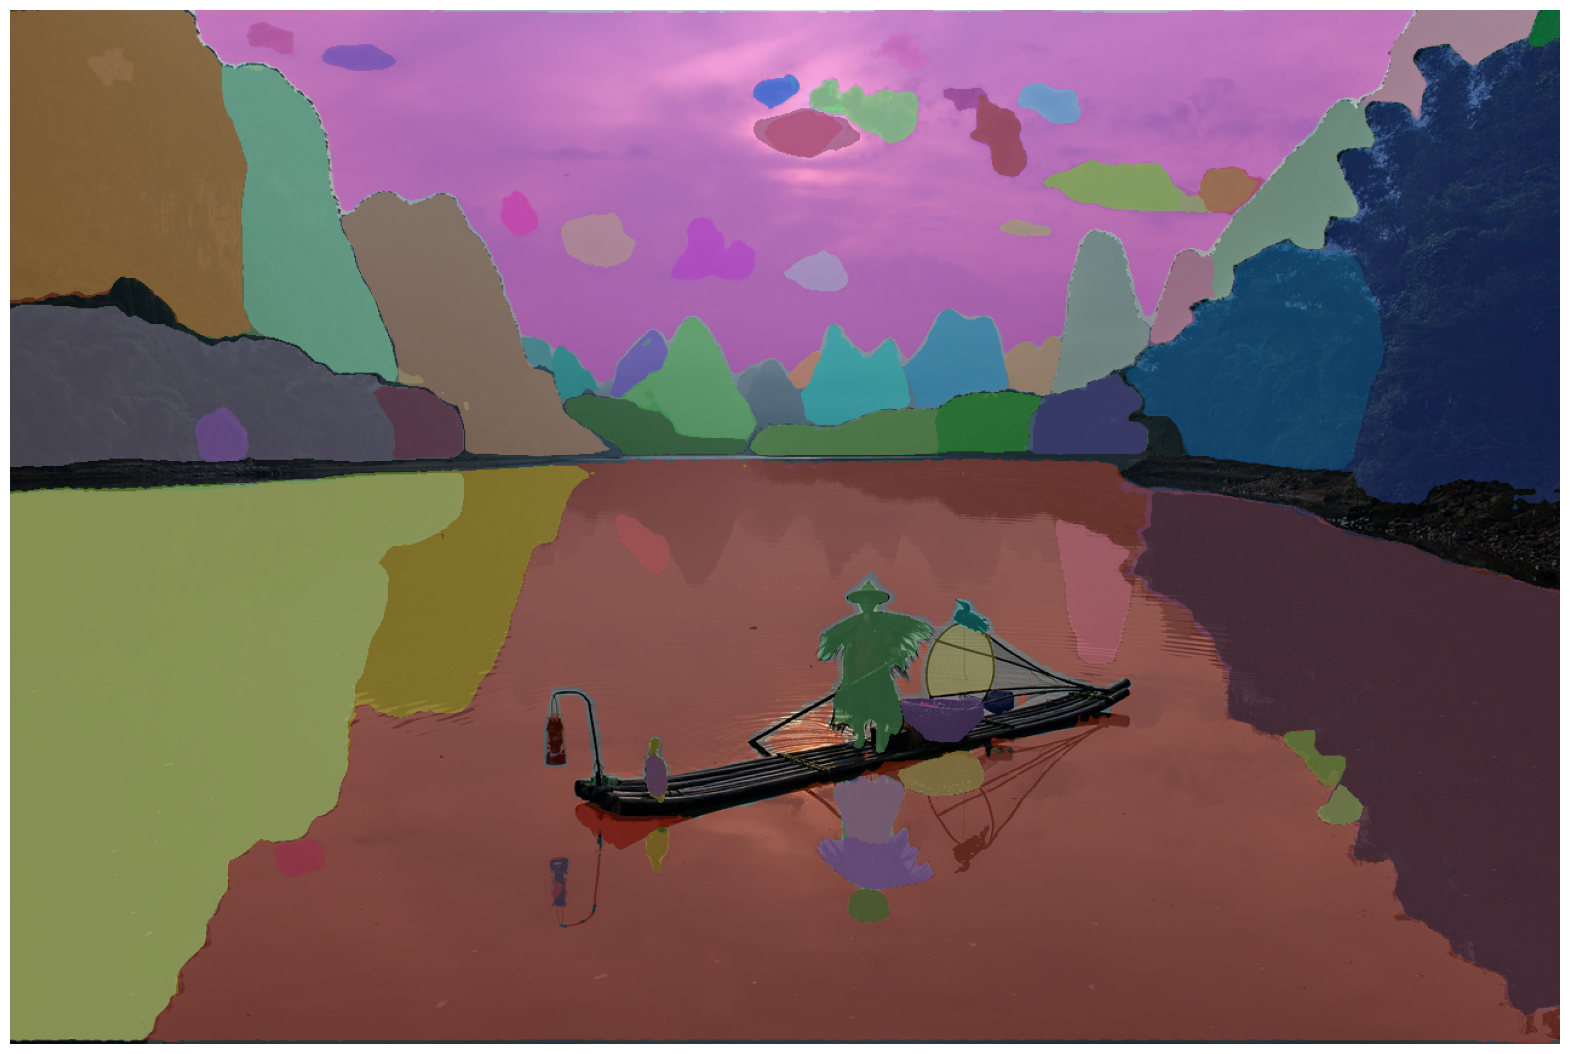

In [71]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(mask)
plt.axis('off')
plt.show()